# Developing a 1D GAN from Scratch
* Both real and generated samples can be plotted and visually inspected to get an idea of what has been learned.

## 1. Selecting a One-Dimensional Function


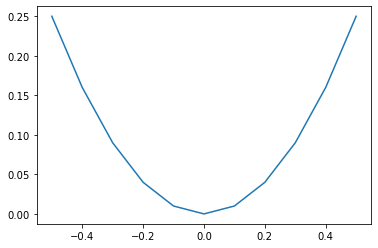

In [1]:
# demonstrate simple x^2 function
from matplotlib import pyplot

# simple function
def calculate(x):
    return x * x

# define inputs
inputs = [-0.5,-0.4,-0.3,-0.2,-0.1,0,0.1,0.2,0.3,0.4,0.5]
# calculate outputs
outputs = [calculate(x) for x in inputs]
# plot the result
pyplot.plot(inputs,outputs)
pyplot.show()

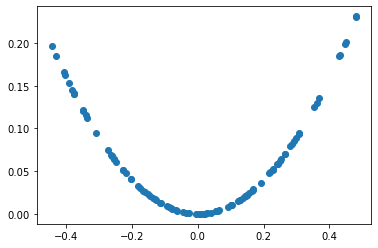

In [2]:
# example of generating random samples from X^2
from numpy.random import rand
from numpy import hstack
from matplotlib import pyplot

# generate randoms sample from x^2
def generate_samples(n=100):
    # generate random inputs in [-0.5,0.5]
    X1 = rand(n) - 0.5
    # generate outputs X^2 (quadratic)
    X2 = X1 * X1
    # stack arrays
    X1 = X1.reshape(n,1)
    X2 = X2.reshape(n,1)
    return hstack((X1,X2))

# generate samples
data = generate_samples()
# plot samples
pyplot.scatter(data[:,0],data[:,1])
pyplot.show()

## 2. Defining a Discriminator Model
* The model must take a sample from our problem,such as vector with two elements,and output a classification prediction whether the sample is real or fake.

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 25)                75        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 26        
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


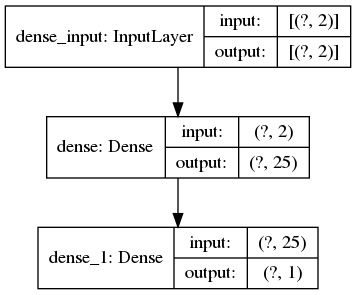

In [1]:
# define the discriminator model
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model

# define the standalone discriminator model
def define_discriminator(n_inputs=2):
    model = Sequential()
    model.add(Dense(25,activation='relu',kernel_initializer='he_uniform',input_dim=n_inputs))
    model.add(Dense(1,activation='sigmoid'))
    # compile model
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model

# define the discriminator model
model = define_discriminator()
# summarize the model
model.summary()
# plot the model
plot_model(model,to_file='discriminator_plot.png',show_shapes=True,show_layer_names=True)

In [3]:
# define and fit a discriminator model
from numpy import zeros
from numpy import ones
from numpy import hstack
from numpy.random import rand
from keras.models import Sequential
from keras.layers import Dense

# define the standalone discriminator model
def define_discriminator(n_inputs=2):
    model = Sequential()
    model.add(Dense(25,activation='relu',kernel_initializer='he_uniform',input_dim=n_inputs))
    model.add(Dense(1,activation='sigmoid'))
    # compile model
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model

# generate n real samples with class labels
def generate_real_samples(n):
    # generate inputs in [-0.5.0.5]
    X1 = rand(n) - 0.5
    # generate outputs X^2
    X2 = X1 * X1
    # stack arrays
    X1 = X1.reshape(n,1)
    X2 = X2.reshape(n,1)
    X = hstack((X1,X2))
    # generate class labels
    y = ones((n,1))
    return X,y

# generate n fake samples with class labels
def generate_fake_labels(n):
    # generate inputs in [-1,1]
    X1 = -1 + rand(n) * 2
    # generate outputs in [-1,1]
    X2 = -1 + rand(n) * 2
    # stack arrays
    X1 = X1.reshape(n,1)
    X2 = X2.reshape(n,1)
    X = hstack((X1,X2))
    # generate class labels
    y = zeros((n,1))
    return X,y

# train the discriminator model
def train_discriminator(model,n_epochs=1000,n_batch=128):
    half_batch = int(n_batch/2)
    # run epoch manually
    for i in range(n_epochs):
        # generate real examples
        X_real,y_real = generate_real_samples(half_batch)
        # update model
        model.train_on_batch(X_real,y_real)
        # generate fake examples
        X_fake,y_fake = generate_fake_labels(half_batch)
        # update model
        model.train_on_batch(X_fake,y_fake)
        # evaluate the model
        _,acc_real = model.evaluate(X_real,y_real,verbose=0)
        _,acc_fake = model.evaluate(X_fake,y_fake,verbose=0)
        print(i,acc_real,acc_fake)
        

# define the discriminator model
model = define_discriminator()
# fit the model
train_discriminator(model)
    

0 0.640625 0.515625
1 0.703125 0.578125
2 0.640625 0.59375
3 0.71875 0.53125
4 0.765625 0.53125
5 0.640625 0.578125
6 0.65625 0.5625
7 0.75 0.640625
8 0.609375 0.578125
9 0.640625 0.59375
10 0.640625 0.59375
11 0.625 0.4375
12 0.640625 0.5625
13 0.625 0.578125
14 0.546875 0.53125
15 0.65625 0.46875
16 0.640625 0.546875
17 0.5 0.515625
18 0.625 0.59375
19 0.59375 0.5625
20 0.546875 0.671875
21 0.546875 0.640625
22 0.609375 0.703125
23 0.59375 0.515625
24 0.53125 0.609375
25 0.5625 0.625
26 0.6875 0.71875
27 0.421875 0.625
28 0.484375 0.71875
29 0.515625 0.640625
30 0.515625 0.6875
31 0.484375 0.546875
32 0.53125 0.59375
33 0.59375 0.671875
34 0.484375 0.640625
35 0.578125 0.65625
36 0.46875 0.6875
37 0.546875 0.75
38 0.59375 0.8125
39 0.609375 0.671875
40 0.59375 0.796875
41 0.515625 0.734375
42 0.453125 0.78125
43 0.5625 0.765625
44 0.453125 0.703125
45 0.609375 0.734375
46 0.65625 0.734375
47 0.5625 0.703125
48 0.5625 0.703125
49 0.390625 0.75
50 0.46875 0.6875
51 0.484375 0.671875
52

414 0.9375 0.984375
415 1.0 0.96875
416 0.953125 0.921875
417 0.921875 0.921875
418 0.921875 0.9375
419 0.859375 0.953125
420 0.9375 0.859375
421 0.875 0.84375
422 0.96875 0.9375
423 0.9375 0.953125
424 0.9375 0.84375
425 0.90625 0.9375
426 0.90625 0.921875
427 0.9375 1.0
428 0.984375 0.875
429 0.9375 0.96875
430 0.90625 0.90625
431 0.921875 0.921875
432 0.984375 0.984375
433 0.96875 0.90625
434 0.90625 0.953125
435 0.9375 0.875
436 0.96875 0.921875
437 0.984375 0.875
438 1.0 0.953125
439 0.96875 0.96875
440 0.9375 0.953125
441 0.921875 0.859375
442 0.953125 0.875
443 0.984375 0.90625
444 0.9375 0.921875
445 0.96875 0.921875
446 0.96875 0.90625
447 0.96875 0.875
448 0.9375 0.921875
449 0.90625 0.921875
450 0.921875 0.875
451 0.9375 0.90625
452 1.0 0.84375
453 0.96875 0.921875
454 0.953125 0.921875
455 1.0 0.890625
456 0.953125 0.921875
457 0.984375 0.90625
458 0.96875 0.875
459 0.984375 0.859375
460 1.0 0.9375
461 0.90625 0.9375
462 0.953125 0.953125
463 0.953125 0.890625
464 0.96875 0

887 1.0 0.859375
888 1.0 0.921875
889 1.0 0.8125
890 1.0 0.796875
891 1.0 0.84375
892 1.0 0.953125
893 1.0 0.859375
894 1.0 0.90625
895 1.0 0.90625
896 1.0 0.890625
897 1.0 0.90625
898 1.0 0.921875
899 1.0 0.9375
900 1.0 0.921875
901 1.0 0.875
902 1.0 0.90625
903 1.0 0.84375
904 1.0 0.828125
905 1.0 0.890625
906 1.0 0.875
907 1.0 0.921875
908 1.0 0.859375
909 1.0 0.90625
910 1.0 0.9375
911 1.0 0.84375
912 1.0 0.90625
913 1.0 0.890625
914 1.0 0.875
915 1.0 0.875
916 1.0 0.890625
917 1.0 0.90625
918 1.0 0.8125
919 1.0 0.796875
920 1.0 0.8125
921 1.0 0.859375
922 1.0 0.8125
923 1.0 0.875
924 1.0 0.890625
925 1.0 0.890625
926 1.0 0.890625
927 1.0 0.828125
928 1.0 0.84375
929 1.0 0.921875
930 1.0 0.9375
931 1.0 0.875
932 1.0 0.875
933 1.0 0.875
934 1.0 0.90625
935 1.0 0.90625
936 1.0 0.9375
937 1.0 0.859375
938 1.0 0.859375
939 1.0 0.859375
940 1.0 0.921875
941 1.0 0.921875
942 1.0 0.890625
943 1.0 0.8125
944 1.0 0.859375
945 1.0 0.875
946 1.0 0.921875
947 1.0 0.84375
948 1.0 0.84375
949 1.

## 3. Defining a Generator Model
* The generator model takes as input a point from the latent space and generates a new sample.

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 15)                90        
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 32        
Total params: 122
Trainable params: 122
Non-trainable params: 0
_________________________________________________________________


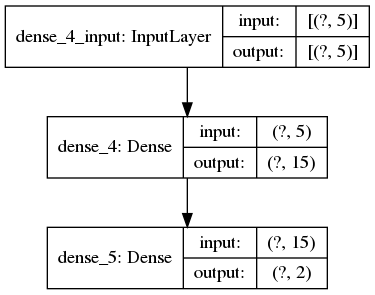

In [4]:
# define the generator model
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model

# define the standalone generator model
def define_generator(latent_dim,n_outputs=2):
    model = Sequential()
    model.add(Dense(15,activation='relu',kernel_initializer='he_uniform',input_dim=latent_dim))
    model.add(Dense(n_outputs,activation='linear'))
    return model

# define the generator model
model = define_generator(5)
# summarize the model
model.summary()
# plot the model
plot_model(model,to_file='generator_plot.png',show_shapes=True,show_layer_names=True)

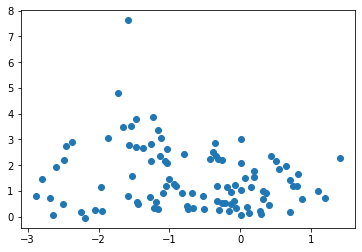

In [5]:
# define and use the generator model
from numpy.random import randn
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot

# define the standalone generator model
def define_generator(latent_dim,n_outputs=2):
    model = Sequential()
    model.add(Dense(15,activation='relu',kernel_initializer='he_uniform',input_dim=latent_dim))
    model.add(Dense(n_outputs,activation='linear'))
    return model

# generate points in latent space as input for the generator
def generator_latent_points(latent_dim,n):
    # generate points in the latent space
    x_input = randn(latent_dim*n)
    # reshape into a batch of inputs for the network
    x_input = x_input.reshape(n,latent_dim)
    return x_input

# use the generator to generate n fake samples and plot the results
def generate_fake_samples(generator,latent_dim,n):
    # generate points in latent space
    x_input = generator_latent_points(latent_dim,n)
    # predict outputs
    X = generator.predict(x_input)
    # plot the results
    pyplot.scatter(X[:,0],X[:,1])
    pyplot.show()
    
# size of the latent space
latent_dim = 5
# define the generator model
model = define_generator(latent_dim)
# generate and plot generated samples
generate_fake_samples(model,latent_dim,100)



## 4. Training the Generator Model
* The weights in the generator model are updated based on the performance of the discriminator model.

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_7 (Sequential)    (None, 2)                 122       
_________________________________________________________________
sequential_6 (Sequential)    (None, 1)                 101       
Total params: 223
Trainable params: 122
Non-trainable params: 101
_________________________________________________________________


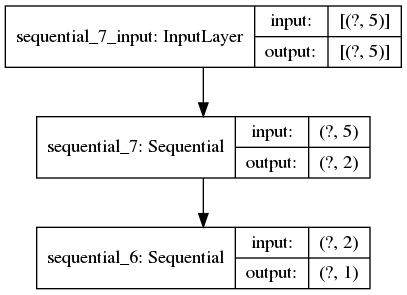

In [7]:
# demonstrate creating the three models in the gan
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model


# define the standalone discriminator model
def define_discriminator(n_inputs=2):
    model = Sequential()
    model.add(Dense(25,activation='relu',kernel_initializer='he_uniform',input_dim=n_inputs))
    model.add(Dense(1,activation='sigmoid'))
    # compile model
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model


# define the standalone generator model
def define_generator(latent_dim,n_outputs=2):
    model = Sequential()
    model.add(Dense(15,activation='relu',kernel_initializer='he_uniform',input_dim=latent_dim))
    model.add(Dense(n_outputs,activation='linear'))
    return model

# define the combined generator and discriminator model,for updating the generator
def define_gan(generator,discriminator):
    # make weights in the discriminator not trainable
    discriminator.trainable = False
    # connect them
    model = Sequential()
    # add generator
    model.add(generator)
    # add the discriminator
    model.add(discriminator)
    # compile model
    model.compile(loss='binary_crossentropy',optimizer='adam')
    return model

# size of the latent space
latent_dim = 5
# create the discriminator
discriminator = define_discriminator()
# create the generator
generator = define_generator(latent_dim)
# create the gan
gan_model = define_gan(generator,discriminator)
# summarize the model
gan_model.summary()
# plot gan model
plot_model(gan_model,to_file='gan_plot.png',show_shapes=True,show_layer_names=True)




In [8]:
# train the generator and discriminator
def training(g_model,d_model,gan_model,latent_dim,n_epochs=10000,n_batch=128):
    # determine half the size of one batch,for updating the discriminator
    half_batch = int(n_batch/2)
    # manually enumerate epochs
    for i in range(n_epochs):
        # prepare real samples
        x_real,y_real = generate_real_samples(half_batch)
        # prepare fake samples
        x_fake,y_fake = generate_fake_samples(g_model,latent_dim,half_batch)
        # update discriminator
        d_model.train_on_batch(x_real,y_real)
        d_model.train_on_batch(x_fake,y_fake)
        # prepare points in latent space as input for the generator
        x_gan = generator_latent_points(latent_dim,n_batch)
        # create inverted labels for the fake samples
        y_gan = ones((n_batch,1))
        # update the generator via the discriminator's error
        gan_model.train_on_batch(x_gan,y_gan)

## 5. Evaluating the Performance of the GAN


In [9]:
# evaluate the discriminator and plot real and fake points
def summarize_performance(epoch,generator,discriminator,latent_dim,n=100):
    # prepare real samples
    x_real,y_real = generate_real_samples(n)
    # evaluate discriminator on real examples
    _, acc_real = discriminator.evaluate(x_real,y_real,verbose=0)
    # prepare fake samples
    x_fake,y_fake = generate_fake_samples(generator,latent_dim,n)
    # evaluate discriminator on fake examples
    _, acc_fake = discriminator.evaluate(x_fake,y_fake,verbose=0)
    # summarize discriminator performance
    print(epoch,acc_real,acc_fake)
    # scatter plot real and fake data points
    pyplot.scatter(x_real[:,0],x_real[:,1],color='red')
    pyplot.scatter(x_fake[:,0],x_fake[:,1],color='blue')
    # save plot to file
    filename = 'generated_plot_e%03d.png' % (epoch+1)
    pyplot.savefig(filename)
    pyplot.close()

## 6. Complete Example of Training the GAN 

In [10]:
# train a generative adversarial network on a one-dimensional function
from numpy import hstack
from numpy import zeros
from numpy import ones
from numpy.random import rand
from numpy.random import randn
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot

# define the standalone discriminator model
def define_discriminator(n_inputs=2):
    model = Sequential()
    model.add(Dense(25,activation='relu',kernel_initializer='he_uniform',input_dim=n_inputs))
    model.add(Dense(1,activation='sigmoid'))
    # compile model
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model


# define the standalone generator model
def define_generator(latent_dim,n_outputs=2):
    model = Sequential()
    model.add(Dense(15,activation='relu',kernel_initializer='he_uniform',input_dim=latent_dim))
    model.add(Dense(n_outputs,activation='linear'))
    return model

# define the combined generator and discriminator model,for updating the generator
def define_gan(generator,discriminator):
    # make weights in the discriminator not trainable
    discriminator.trainable = False
    # connect them
    model = Sequential()
    # add generator
    model.add(generator)
    # add the discriminator
    model.add(discriminator)
    # compile model
    model.compile(loss='binary_crossentropy',optimizer='adam')
    return model

# generate n real samples with class labels
def generate_real_samples(n):
    # generate inputs in [-0.5.0.5]
    X1 = rand(n) - 0.5
    # generate outputs X^2
    X2 = X1 * X1
    # stack arrays
    X1 = X1.reshape(n,1)
    X2 = X2.reshape(n,1)
    X = hstack((X1,X2))
    # generate class labels
    y = ones((n,1))
    return X,y

# generate points in latent space as input for the generator
def generator_latent_points(latent_dim,n):
    # generate points in the latent space
    x_input = randn(latent_dim*n)
    # reshape into a batch of inputs for the network
    x_input = x_input.reshape(n,latent_dim)
    return x_input

# use the generator to generate n fake samples and plot the results
def generate_fake_samples(generator,latent_dim,n):
    # generate points in latent space
    x_input = generator_latent_points(latent_dim,n)
    # predict outputs
    X = generator.predict(x_input)
    # create class labels
    y = zeros((n,1))
    return X,y

# evaluate the discriminator and plot real and fake points
def summarize_performance(epoch,generator,discriminator,latent_dim,n=100):
    # prepare real samples
    x_real,y_real = generate_real_samples(n)
    # evaluate discriminator on real examples
    _, acc_real = discriminator.evaluate(x_real,y_real,verbose=0)
    # prepare fake samples
    x_fake,y_fake = generate_fake_samples(generator,latent_dim,n)
    # evaluate discriminator on fake examples
    _, acc_fake = discriminator.evaluate(x_fake,y_fake,verbose=0)
    # summarize discriminator performance
    print(epoch,acc_real,acc_fake)
    # scatter plot real and fake data points
    pyplot.scatter(x_real[:,0],x_real[:,1],color='red')
    pyplot.scatter(x_fake[:,0],x_fake[:,1],color='blue')
    # save plot to file
    filename = 'generated_plot_e%03d.png' % (epoch+1)
    pyplot.savefig(filename)
    pyplot.close()
    
# train the generator and discriminator
def train(g_model,d_model,gan_model,latent_dim,n_epochs=10000,n_batch=128,n_eval=2000):
    # determine half the size of one batch,for updating the discriminator
    half_batch = int(n_batch/2)
    # manually enumerate epochs
    for i in range(n_epochs):
        # prepare real samples
        x_real,y_real = generate_real_samples(half_batch)
        # prepare fake samples
        x_fake,y_fake = generate_fake_samples(g_model,latent_dim,half_batch)
        # update discriminator
        d_model.train_on_batch(x_real,y_real)
        d_model.train_on_batch(x_fake,y_fake)
        # prepare points in latent space as input for the generator
        x_gan = generator_latent_points(latent_dim,n_batch)
        # create inverted labels for the fake samples
        y_gan = ones((n_batch,1))
        # update the generator via the discriminator's error
        gan_model.train_on_batch(x_gan,y_gan)
        # evaluate the model every n_eval epochs
        if (i+1) % n_eval == 0:
            summarize_performance(i,g_model,d_model,latent_dim)
            
# size of the latent space
latent_dim = 5
# create the discriminator
discriminator = define_discriminator()
# create the generator
generator = define_generator(latent_dim)
# create the gan
gan_model = define_gan(generator,discriminator)
# train model
train(generator,discriminator,gan_model,latent_dim)








1999 0.5600000023841858 0.4399999976158142
3999 0.6399999856948853 0.47999998927116394
5999 0.5099999904632568 0.6399999856948853
7999 0.5899999737739563 0.36000001430511475
9999 0.46000000834465027 0.46000000834465027
